### Imports

In [94]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc
sklearn.__version__

'1.7.1'

### Trick 01 - کاربرد Random State در Scikit-Learn


In [95]:
df = pd.read_csv("../../00 DATA/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [96]:
cols = ['fare','embarked','sex']
x = df[cols]
y = df['survived']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x

,fare,embarked,sex
0,211.3375,S,female
1,151.5500,S,male
2,151.5500,S,female
3,151.5500,S,male
4,151.5500,S,female
...,...,...,...
1304,14.4542,C,female
1305,14.4542,C,female
1306,7.2250,C,male
1307,7.2250,C,male


In [99]:
x_test,x_train,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=1)
x_train.head()

,fare,embarked,sex
201,51.8625,S,male
115,263.0000,S,male
255,69.3000,C,female
1103,39.6875,S,male
195,86.5000,S,female


In [100]:
x_test,x_train,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=1)
x_train.head()

,fare,embarked,sex
201,51.8625,S,male
115,263.0000,S,male
255,69.3000,C,female
1103,39.6875,S,male
195,86.5000,S,female


In [101]:
# هر بار که این دستور رو اجرا کنیم باز هم یک دیتا رو میگیرم چون رندوم استیت یک هست


In [102]:
x_test,x_train,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=42)
x_train.head()

,fare,embarked,sex
1148,7.1250,S,male
1049,15.7417,C,male
982,7.8958,S,male
808,8.0500,S,male
1195,7.7500,Q,male


In [103]:
x_test,x_train,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=42)
x_train.head()

,fare,embarked,sex
1148,7.1250,S,male
1049,15.7417,C,male
982,7.8958,S,male
808,8.0500,S,male
1195,7.7500,Q,male


In [104]:
# اما وقتی رندوم استیت رو عوض کنیم هر بار تفاوت خواهیم داشت

In [105]:
del df,x,y,x_test,x_train,y_train,y_test, cols
gc.collect()

12

### Trick 02 - کاربرد Stratify در Scikit-Learn

In [106]:
# هدف اینه که تقسیم بندی دیتا تست و ترین رو به یک نوع انجام دهیم که که تناسب کفیت داشته باشن


df = pd.DataFrame({'feature':list(range(12)), 'target':['Not Fraud']*10 + ['Fraud']*2})
#dft02.sample()


In [107]:
x = df['feature']
y = df['target']


In [108]:
from sklearn.model_selection import train_test_split

#### **Not stratified**

`y_train` contains **NONE** of the minority class, whereas `y_test` contains **ALL** of the minority class. (This is bad!)

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=0)

In [110]:
y_train

1    Not Fraud
7    Not Fraud
9    Not Fraud
3    Not Fraud
0    Not Fraud
5    Not Fraud
Name: target, dtype: object

In [111]:
y_test

6     Not Fraud
11        Fraud
4     Not Fraud
10        Fraud
2     Not Fraud
8     Not Fraud
Name: target, dtype: object

#### Stratified

Class proportions are the **SAME** in `y_train` and `y_test`. (This is good!)

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=0, stratify=y)

In [113]:
y_train

2     Not Fraud
8     Not Fraud
4     Not Fraud
1     Not Fraud
11        Fraud
9     Not Fraud
Name: target, dtype: object

In [114]:
y_test

0     Not Fraud
7     Not Fraud
3     Not Fraud
5     Not Fraud
10        Fraud
6     Not Fraud
Name: target, dtype: object

#### Delete

In [115]:
del df,x,y,x_test,x_train,y_train,y_test
gc.collect()

0

### Trick 03 - کاربرد Missing Indicator در Scikit-Learn

In [116]:
#این مثال رو در نظر بگیرید

x = pd.DataFrame({
    'age':[20,30, 10 , np.nan, 10]
})
x

,age
0,20.0
1,30.0
2,10.0
3,NaN
4,10.0


In [117]:
""" ما نمی تونیم دیتایی که نات نامبر هست رو نگر داریم برای همین باید یه فکری براش بکنیم
مثلا باید دراپشون کنیم
یکی از راها اینه که با میانگین گرفتن از بقیه ریکورد ها جاشو پر کنیم
"""
from sklearn.impute import SimpleImputer

In [118]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#'constant', 'median', 'most_frequent', 'mean'
# imputer = SimpleImputer()
imputer.fit_transform(x)


array([[20. ],
       [30. ],
       [10. ],
       [17.5],
       [10. ]])

In [119]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
#'constant', 'median', 'most_frequent', 'mean'
# imputer = SimpleImputer()
imputer.fit_transform(x)


array([[20.],
       [30.],
       [10.],
       [15.],
       [10.]])

In [120]:
# پرچم گذاری : برای اینکه بفهمیم این داده میس ولو هست و توسط ما پر شده
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(x)


array([[20. ,  0. ],
       [30. ,  0. ],
       [10. ,  0. ],
       [17.5,  1. ],
       [10. ,  0. ]])

In [121]:
del x, imputer
gc.collect()

0

### Trick 04 - کاربرد Pipeline در Scikit-Learn


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Feature selector that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold

# For setting up pipeline
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

In [123]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep = '\s+',
    header=None)

df.head(50)

,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
5,ALKH_ECOLI,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp
6,AMPD_ECOLI,0.29,0.28,0.48,0.5,0.44,0.23,0.34,cp
7,AMY2_ECOLI,0.21,0.34,0.48,0.5,0.51,0.28,0.39,cp
8,APT_ECOLI,0.20,0.44,0.48,0.5,0.46,0.51,0.57,cp
9,ARAC_ECOLI,0.42,0.40,0.48,0.5,0.56,0.18,0.30,cp


In [124]:
# The data matrix X
X = df.iloc[:,1:-1]
# The labels
y = (df.iloc[:,-1:])

In [125]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size= 1/3,
    random_state=0
)
print(X_train.shape, X_test.shape)

(224, 7) (112, 7)


In [127]:
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

Training set score: 0.9017857142857143
Test set score: 0.8482142857142857


Pipline

#### Setting Up a Machine Learning Pipeline

we’ll set up a very basic pipeline that consists of the following sequence:

1. Scaler: For pre-processing data, i.e., transform the data to zero mean and unit variance using the StandardScaler().
2. Feature selector: Use VarianceThreshold() for discarding features whose variance is less than a certain defined threshold.
3. Classifier: KNeighborsClassifier(), which implements the k-nearest neighbor classifier and selects the class of the majority k points, which are closest to the test example.

In [128]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', VarianceThreshold()),
    ('classifier', KNeighborsClassifier())
])

In [129]:
pipe.fit(X_train, y_train)

print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.8794642857142857
Test set score: 0.8392857142857143


#### Delete

In [130]:
del GridSearchCV,KNeighborsClassifier, VarianceThreshold, pipe, Pipeline,knn, y, y_train, y_test,X, X_train, X_test, df, encoder
gc.collect()

167

### Trick 05 - کاربرد Column Transformers در Scikit-Learn

In [131]:
df = pd.read_csv("../../00 DATA/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [132]:
cols = ['fare', 'embarked', 'sex', 'age']
X = df[cols]
X

,fare,embarked,sex,age
0,211.3375,S,female,29.00
1,151.5500,S,male,0.92
2,151.5500,S,female,2.00
3,151.5500,S,male,30.00
4,151.5500,S,female,25.00
...,...,...,...,...
1304,14.4542,C,female,14.50
1305,14.4542,C,female,NaN
1306,7.2250,C,male,26.50
1307,7.2250,C,male,27.00


In [133]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer

In [134]:
ohe = OneHotEncoder()
si = SimpleImputer()

In [135]:
ct = make_column_transformer(
    (ohe, ['embarked', "sex"]),
    (si, ['fare']),
    remainder='passthrough'
)

In [136]:
ct.fit_transform(X)


array([[  0.    ,   0.    ,   1.    , ...,   0.    , 211.3375,  29.    ],
       [  0.    ,   0.    ,   1.    , ...,   1.    , 151.55  ,   0.92  ],
       [  0.    ,   0.    ,   1.    , ...,   0.    , 151.55  ,   2.    ],
       ...,
       [  1.    ,   0.    ,   0.    , ...,   1.    ,   7.225 ,  26.5   ],
       [  1.    ,   0.    ,   0.    , ...,   1.    ,   7.225 ,  27.    ],
       [  0.    ,   0.    ,   1.    , ...,   1.    ,   7.875 ,  29.    ]],
      shape=(1309, 8))

In [137]:
del ohe, ct,si ,df, cols,X, ColumnTransformer
gc.collect()

2791

### Trick 06 -نحوه انتخاب ستون ها با استفاده از Column Transformers

In [138]:
df = pd.read_csv("../../00 DATA/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [139]:
cols = ['fare', 'embarked', 'sex', 'age']
X = df[cols]
X

,fare,embarked,sex,age
0,211.3375,S,female,29.00
1,151.5500,S,male,0.92
2,151.5500,S,female,2.00
3,151.5500,S,male,30.00
4,151.5500,S,female,25.00
...,...,...,...,...
1304,14.4542,C,female,14.50
1305,14.4542,C,female,NaN
1306,7.2250,C,male,26.50
1307,7.2250,C,male,27.00


In [140]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

In [141]:
ohe = OneHotEncoder()  # ساخت یک OneHotEncoder برای تبدیل داده‌های категоوری

ct = make_column_transformer((ohe, ['Embarked', 'Sex']))
ct = make_column_transformer((ohe, [1, 2]))
ct = make_column_transformer((ohe, slice(1, 3)))
ct = make_column_transformer((ohe, [False, True, True, False]))
ct = make_column_transformer((ohe, make_column_selector(pattern='E|S')))
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)))
ct = make_column_transformer((ohe, make_column_selector(dtype_exclude='number')))

In [142]:
ct.fit_transform(X)

array([[0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.]], shape=(1309, 6))

Delete

In [143]:
del X, cols,ct,df,ohe,
gc.collect()

23

### ~~Trick 07 - نحوه دریافت Confusion Matrix در Scikit-Learn~~ منسوخ

### Trick 08 - نحوه ترسیم نمودار ROC Curve در Scikit-Learn

In [144]:
df = pd.read_csv("../../00 DATA/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

In [146]:
cols = ['pclass', 'fare', 'sibsp']
X = df[cols]
y = df['survived']


In [147]:
# حذف ردیف‌هایی که دارای مقادیر NaN هستند
X_clean = X.dropna()
y_clean = y[X_clean.index]

# تقسیم داده‌های تمیز
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


In [148]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [149]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


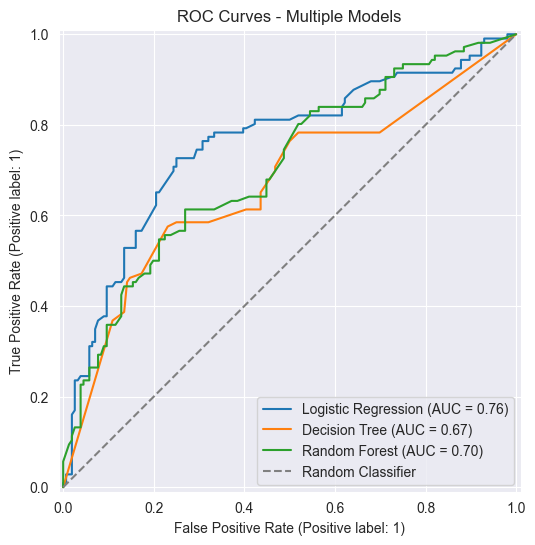

In [150]:
fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax, name='Logistic Regression')
RocCurveDisplay.from_estimator(dt, X_test, y_test, ax=ax, name='Decision Tree')
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, name='Random Forest')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.title('ROC Curves - Multiple Models')
plt.legend()
plt.show()

Delete

In [151]:
del df , fig ,ax, X, y ,X_train,X_test,y_train,y_test,X_clean,y_clean, lr ,rf, dt, cols, DecisionTreeClassifier, RandomForestClassifier, LogisticRegression
gc.collect()

4105

### Trick 09 - تفاوت Drop و Passthrough در Column Transformers

In [152]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [153]:
impute = SimpleImputer()

In [154]:
X = pd.DataFrame({'A':[1, 2, np.nan],
                  'B':[10, 20, 30],
                  'C':[100, 200, 300],
                  'D':[1000, 2000, 3000],
                  'E':[10000, 20000, 30000]})

In [155]:
# impute A, passthrough B & C, then drop the remaining columns
ct = make_column_transformer(
    (impute, ['A']),
    ('passthrough', ['B', 'C']),
    remainder='drop')

In [156]:
ct.fit_transform(X)

array([[  1. ,  10. , 100. ],
       [  2. ,  20. , 200. ],
       [  1.5,  30. , 300. ]])

In [157]:
# impute A, drop D & E, then passthrough the remaining columns
ct = make_column_transformer(
    (impute, ['A']),
    ('drop', ['D', 'E']),
    remainder='passthrough')

In [158]:
ct.fit_transform(X)

array([[  1. ,  10. , 100. ],
       [  2. ,  20. , 200. ],
       [  1.5,  30. , 300. ]])

Delete

In [159]:
del ct, impute, X
gc.collect()

46

### Trick 10 - نحوه Encode نمودن داده های Categorical در Scikit-Learn

Two common ways to encode categorical features:

- OneHotEncoder for unordered (nominal) data
- OrdinalEncoder for ordered (ordinal) data

See example 👇

P.S. LabelEncoder is for labels, not features!

In [160]:
X = pd.DataFrame({'Shape':['square', 'square', 'oval', 'circle'],
                  'Class': ['third', 'first', 'second', 'third'],
                  'Size': ['S', 'S', 'L', 'XL']})
X

,Shape,Class,Size
0,square,third,S
1,square,first,S
2,oval,second,L
3,circle,third,XL


In [161]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [162]:
ohe = OneHotEncoder()
print(ohe.fit_transform(X[['Shape']]))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 3)>
  Coords	Values
  (0, 2)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
  (3, 0)	1.0


In [163]:
oe = OrdinalEncoder(categories=[['first', 'second', 'third'], ['S', 'M', 'L', 'XL']])
oe.fit_transform(X[['Class','Size']])

array([[2., 0.],
       [0., 0.],
       [1., 2.],
       [2., 3.]])

Delete

In [164]:
del ohe , oe, X
gc.collect()

0

### Trick 11 - نحوه Save و Load نمودن مدل نهایی در Scikit-Learn

In [165]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline

In [166]:
df = pd.read_csv("../../00 DATA/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [167]:
cols = ["embarked","sex"]
X = df[cols]
X_new = df[cols]
y = df['survived']

In [168]:
ohe = OneHotEncoder()
logreg = LogisticRegression()


In [169]:
pipe = make_pipeline(ohe, logreg)

In [170]:
pipe.fit(X, y)
pipe.predict(X_new)
gc.collect()


29

SAVE

In [171]:
import joblib
joblib.dump(pipe, '../../00 DATA/titanic.pkl')

['../../00 DATA/titanic.pkl']

LOAD and USE

In [172]:
model = joblib.load('../../00 DATA/titanic.pkl')
#use
model.predict(X_new)
model.score(X_new, y)

0.7799847211611918

Delete

In [173]:
del pipe, X, X_new, y,cols, make_pipeline , ohe, logreg, df, model, Pipeline
gc.collect()

0

### Trick 12 - کاربرد Grid-Search و Cross Validation در Scikit-Learn

<img src = "https://scikit-learn.org/stable/_images/grid_search_workflow.png" width=50%>

In [174]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')

In [175]:
df = pd.read_csv("../../00 DATA/titanic.csv")

In [176]:
cols = ['sex', 'name']
X = df[cols]
y = df['survived']

In [177]:
ohe = OneHotEncoder()
vect = CountVectorizer()
ct = make_column_transformer((ohe, ["sex"]), (vect, 'name'))

In [178]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [179]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct, clf)

<img src = "https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=50%>

#### Use Cross-Validation

In [180]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

np.float64(0.7723055774911527)

In [181]:
# specify parameter values to search
params = {}
params['columntransformer__countvectorizer__min_df'] = [1, 2]
params['logisticregression__C'] = [0.1, 1, 10]
params['logisticregression__penalty'] = ['l1', 'l2']

In [182]:
# try all possible combinations of those parameter values
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X, y);

In [183]:
# what was the best score found during the search?
grid.best_score_

np.float64(0.7776578631803692)

In [184]:
# which combination of parameters produced the best score?
grid.best_params_

{'columntransformer__countvectorizer__min_df': 1,
 'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2'}

Delete

In [185]:
del X , clf , df, grid , ohe, params,y,vect,cols, GridSearchCV, ct, pipe
gc.collect()

938

### Trick 13 - نکات تکمیلی کار با درخت تصمیم (Decision Tree) در Scikit-Learn

In [188]:
iris = pd.read_csv("../../00 DATA/iris.csv")
iris=iris.loc[:,['SepalLengthCm','SepalWidthCm','Species']]
iris.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


In [192]:
X = iris.drop(columns=['Species'])
y = iris['Species']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=45)

In [193]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=45)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

In [194]:
tree.get_depth()

10

In [197]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_train_pred),round(accuracy_score(y_test,y_test_pred),2))

0.95 0.63


#### a) حرص کردن چون دیتا اورفیت شده

In [199]:
path=tree.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']

alphas

array([0.        , 0.00277778, 0.00277778, 0.00324074, 0.00518519,
       0.00555556, 0.00555556, 0.00694444, 0.00743464, 0.00868056,
       0.01041667, 0.01161038, 0.01230159, 0.01581699, 0.02010944,
       0.05683866, 0.06089286, 0.20756944])

In [200]:
len(alphas)

18

In [201]:
alphas.min(),alphas.max()

(np.float64(0.0), np.float64(0.2075694444444443))

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

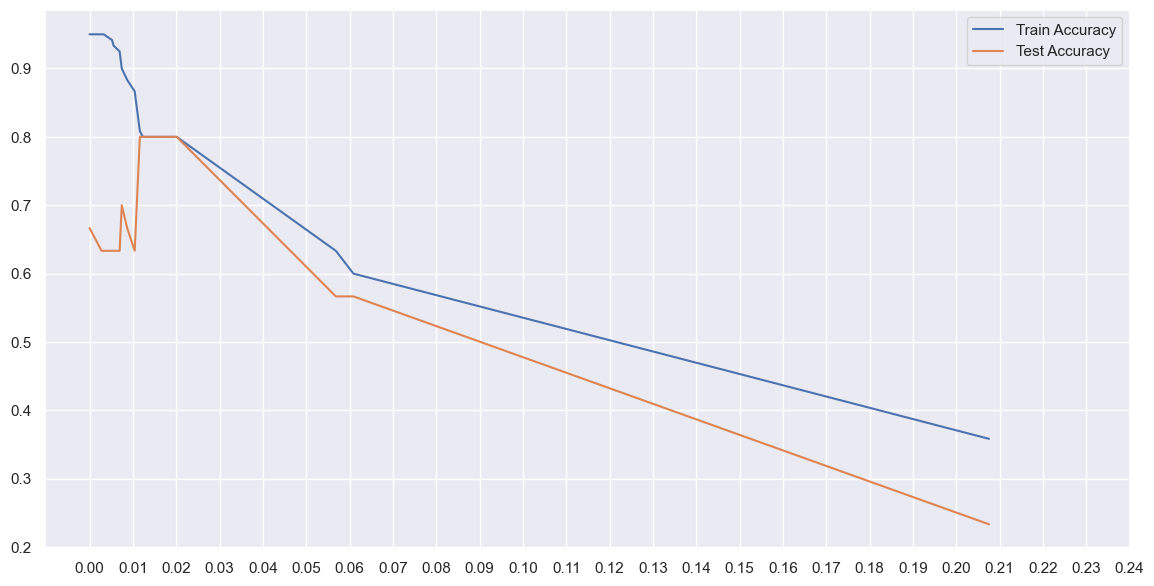

In [204]:
accuracy_train,accuracy_test=[],[]

for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)

    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)

    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))


sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [205]:
# بیشترین دقت بین 0.1 تا 0.2 هست
tree = DecisionTreeClassifier(ccp_alpha=0.02,random_state=40)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.8 0.8


### Trick 14 - ادامه نکات تکمیلی کار با درخت تصمیم (Decision Tree) در Scikit-Learn

In [209]:

df = pd.read_csv('../../00 DATA/titanic.csv', sep = ',')
df['sex'] = df['sex'].map({'male':0, 'female':1})
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [211]:
feature = ['pclass', 'fare','sex']
X = df[feature]
y = df['survived']

In [212]:
classes = ['deceased','survived']

In [213]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2, random_state=0)
dt.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


a) چاپ مدل

In [214]:
from sklearn.tree import plot_tree, export_text

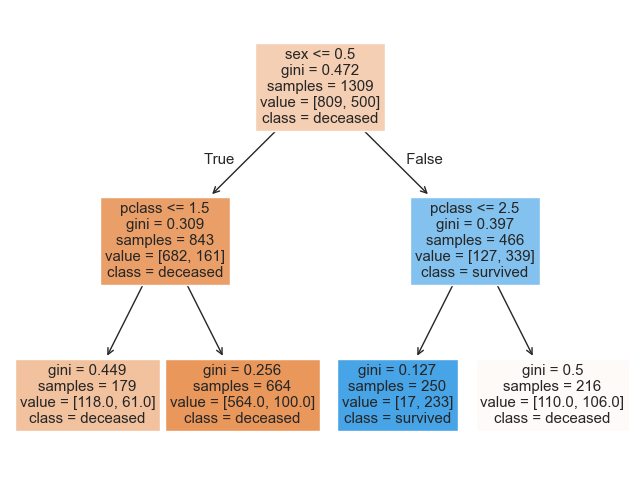

In [219]:
plt.figure(figsize=(8, 6))
plot_tree(dt, feature_names=feature, class_names=classes, filled=True);

In [222]:
print(export_text(dt , feature_names=feature, show_weights=True))

|--- sex <= 0.50
|   |--- pclass <= 1.50
|   |   |--- weights: [118.00, 61.00] class: 0
|   |--- pclass >  1.50
|   |   |--- weights: [564.00, 100.00] class: 0
|--- sex >  0.50
|   |--- pclass <= 2.50
|   |   |--- weights: [17.00, 233.00] class: 1
|   |--- pclass >  2.50
|   |   |--- weights: [110.00, 106.00] class: 0



#### Pulling

In [225]:
features = ['pclass', 'fare', 'sex', 'parch']
X = df[features]
y = df['survived']

In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [227]:
# default tree has 331 nodes
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X, y).tree_.node_count

445

In [228]:
cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()

np.float64(0.6455324500599573)

In [229]:
# pruned tree has 121 nodes
dt = DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)
dt.fit(X, y).tree_.node_count

113

In [230]:
# pruning improved the cross-validated accuracy
cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()

np.float64(0.6470386943932613)

### Trick 15 - نکته نحوه Drop کردن داده‌ها پس از Encoding در Scikit-Learn

In [231]:
X = pd.DataFrame({'Shape':['circle', 'oval', 'square', 'square'],
                  'Color': ['pink', 'yellow', 'pink', 'yellow']})

In [232]:
from sklearn.preprocessing import OneHotEncoder

In [233]:
X

,Shape,Color
0,circle,pink
1,oval,yellow
2,square,pink
3,square,yellow


In [237]:
# drop=None (default) creates one feature column per category
ohe = OneHotEncoder(sparse_output=False, drop=None)
ohe.fit_transform(X)

array([[1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.]])

In [239]:
# drop='first' drops the first category in each feature
ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe.fit_transform(X)

array([[0., 0., 0.],
       [1., 0., 1.],
       [0., 1., 0.],
       [0., 1., 1.]])

In [240]:
# drop='if_binary' drops the first category of binary features
ohe = OneHotEncoder(sparse_output=False, drop='if_binary')
ohe.fit_transform(X)
# این کار باعث میشه خلوط تر باشه


array([[1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.]])

Delete

In [241]:
del ohe, X
gc.collect()

41

### Trick 16 - ساخت Transformer شخصی سازی شده در Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

#Data Import
data = pd.DataFrame(load_iris()['data'],columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self,X,y=None):
        self.lower_bound = []
        self.upper_bound = []
        X.apply(self.outlier_detector)
        return self

    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
            X.iloc[:, i] = x
        return X

outlier_remover = OutlierRemover()